# Task - 3Stock Market Prediction and Forecasting using Stacked LSTM

# Importing the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

# loading the dataset

In [6]:
#Import the data and remove rows containing NAN values
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data = data.iloc[::-1]

# Displaying the first five rows of the dataset

In [7]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Displaying the last five rows

In [8]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


# Displaying information about the dataset

In [9]:
data.shape

(2035, 8)

In [10]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

# Data Cleaning and Preprocessing

## Checking for the null values

In [13]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [15]:
#Checking for the duplicate values
duplicates = data.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

# Statistical Description of the Dataset

In [16]:
data.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<AxesSubplot:>

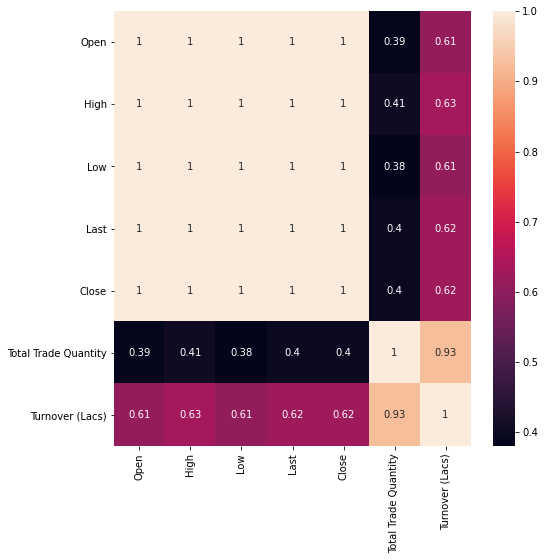

In [17]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot = True)

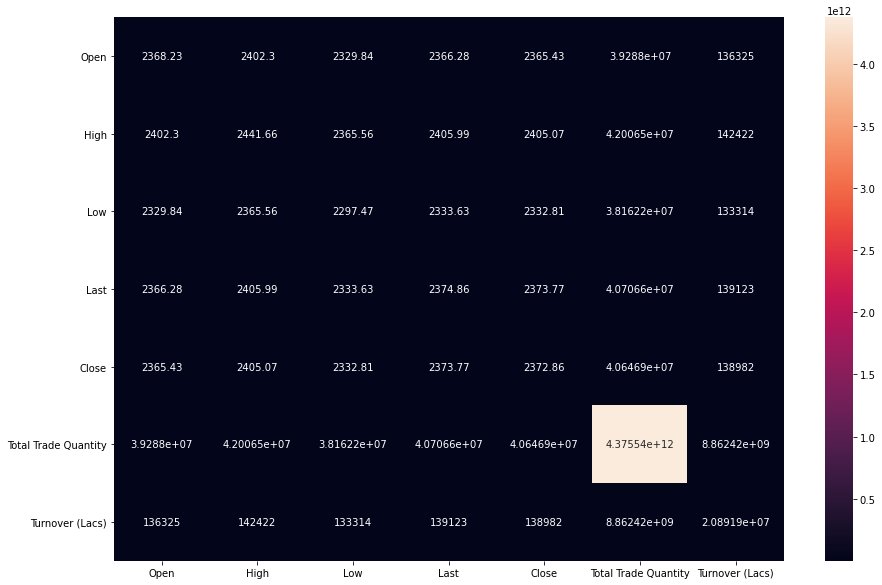

In [18]:
plt.figure(figsize = (15,10))
sns.heatmap(data.cov(), annot = True, fmt = 'g')
plt.show()


# Data Visualisation


## Plotting the graphs for Open, Close, High, Low, & Last price

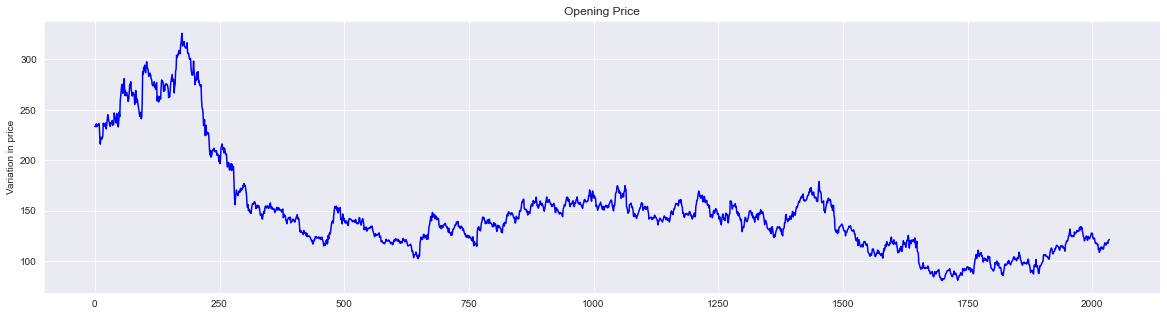

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'b')
plt.ylabel('Variation in price')
plt.title("Opening Price")
plt.show()

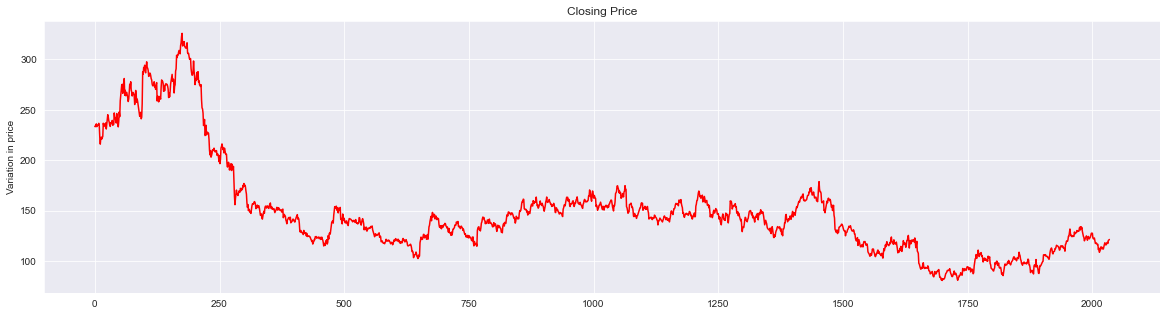

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Close, color = 'r')
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

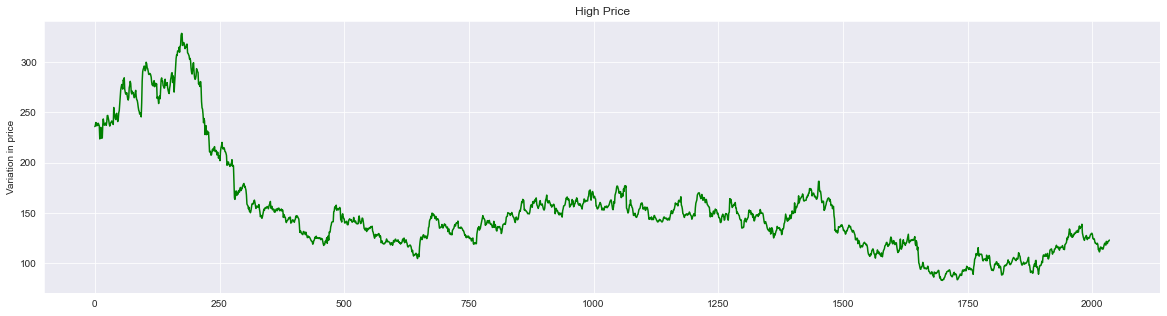

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.High, color = 'g')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

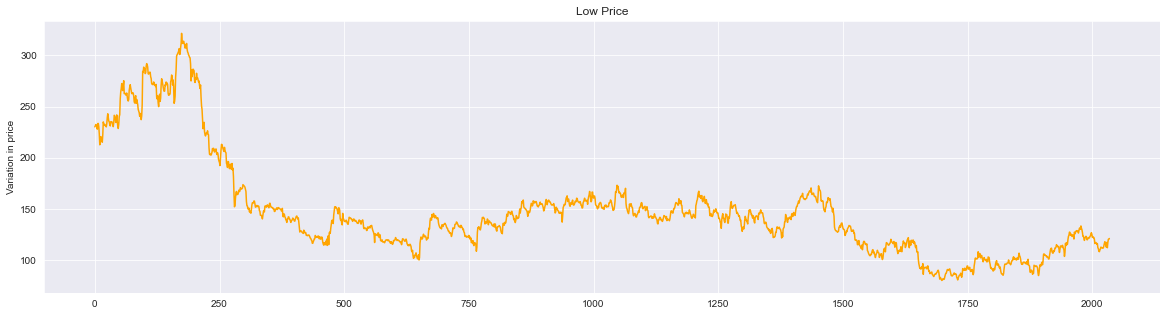

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Low, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("Low Price")
plt.show()

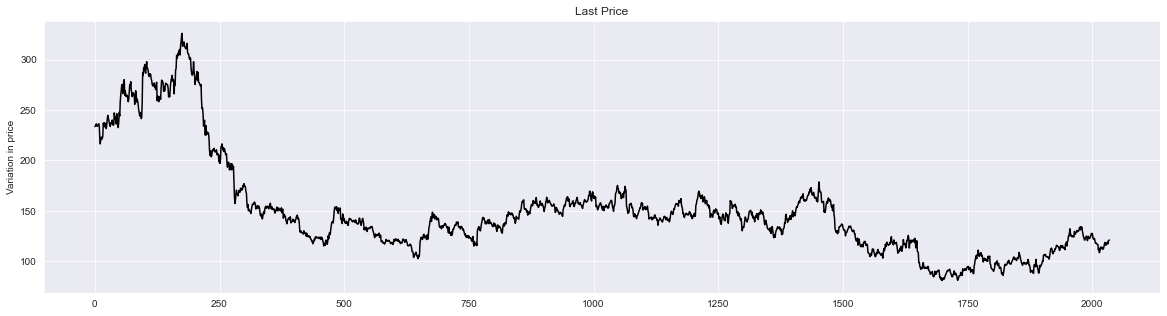

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,5))
plt.plot(data.Last, color = 'Black')
plt.ylabel('Variation in price')
plt.title("Last Price")
plt.show()

In [25]:
data.Date = pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index = data['Date']
data.drop('Date', axis = 1,inplace = True)
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60


# Building the model

In [26]:
data_high=data.reset_index()['High']

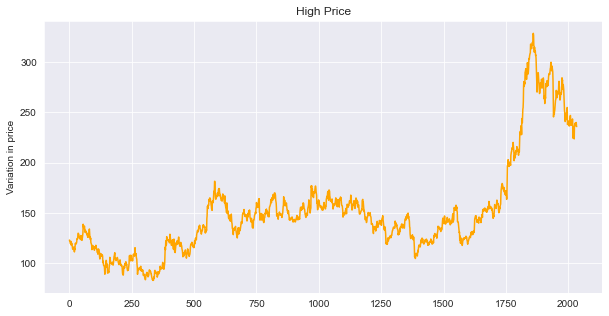

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
plt.plot(data_high, color = 'Orange')
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

# Feature Scaling

In [28]:
scaler = MinMaxScaler(feature_range = (0,1))
data_high = scaler.fit_transform(np.array(data_high).reshape(-1,1))

In [29]:
data_high.shape

(2035, 1)

In [30]:
data_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [31]:
#Splitting the data into train and test sets
training_size = int(len(data_high) * 0.75)
test_size = len(data_high) - training_size
train_data, test_data = data_high[0:training_size,:], data_high[training_size:len(data_high),:1]


In [32]:
training_size,test_size

(1526, 509)

In [33]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [35]:
#Reshaping the input to (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [36]:
print("The shape of X_train is : ", X_train.shape), print("The shape of Y_train is : ", Y_train.shape)

The shape of X_train is :  (1425, 100, 1)
The shape of Y_train is :  (1425,)


(None, None)

In [37]:
print("The shape of X_test is : ", X_test.shape), print("The shape of Y_test is : ", Y_test.shape)

The shape of X_test is :  (408, 100, 1)
The shape of Y_test is :  (408,)


(None, None)

# Creating the LSTM Model

In [38]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 11s 208ms/step - loss: 0.0101 - val_loss: 0.0263
Epoch 2/100
23/23 [==============================] - 4s 157ms/step - loss: 0.0020 - val_loss: 0.0044
Epoch 3/100
23/23 [==============================] - 4s 161ms/step - loss: 8.7318e-04 - val_loss: 0.0030
Epoch 4/100
23/23 [==============================] - 4s 157ms/step - loss: 7.5874e-04 - val_loss: 0.0032
Epoch 5/100
23/23 [==============================] - 4s 166ms/step - loss: 7.2512e-04 - val_loss: 0.0033
Epoch 6/100
23/23 [==============================] - 4s 163ms/step - loss: 6.9830e-04 - val_loss: 0.0038
Epoch 7/100
23/23 [==============================] - 4s 173ms/step - loss: 6.6940e-04 - val_loss: 0.0041
Epoch 8/100
23/23 [==============================] - 3s 152ms/step - loss: 6.5679e-04 - val_loss: 0.0028
Epoch 9/100
23/23 [==============================] - 4s 166ms/step - loss: 6.2327e-04 - val_loss: 0.0037
Epoch 10/100
23/23 [==============================] - 3s 146ms

KeyboardInterrupt: 

# Making predictions

In [41]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [42]:
#Transforming to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [43]:
#Model Evaluation
#Calculating RMSE performance metrics
math.sqrt(mean_squared_error(Y_train, train_predict))

137.7005224619117

# Plotting the results

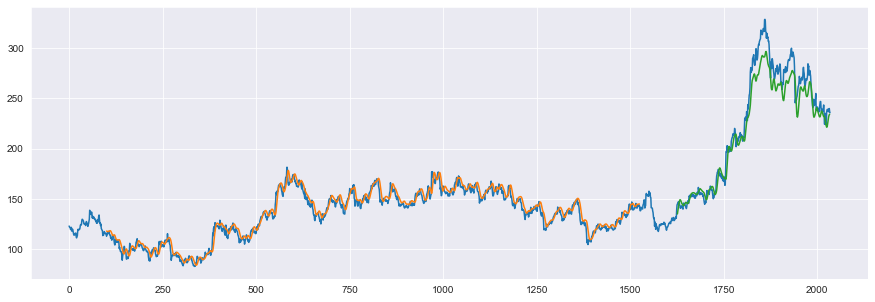

In [44]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_high) - 1, :] = test_predict

#Plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(data_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Making predictions for next 30 days

In [45]:
len(test_data), X_test.shape

(509, (408, 100, 1))

In [46]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 100)

In [47]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
day_new.shape

In [ ]:
day_pred.shape

In [ ]:
data_new = data_high.tolist()
data_new.extend(lst_output)

In [ ]:
len(data_high)

In [ ]:
plt.plot(day_new, scaler.inverse_transform(data_high[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [ ]:
data_new = data_high.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

In [ ]:
data_new = scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(data_new)